In [1]:
!pip install pandas matplotlib seaborn numpy scikit-learn nltk cufflinks textblob wordcloud pillow


  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached cufflinks-0.17.3-py3-none-any.whl
  Using cached textblob-0.19.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached wordcloud-1.9.4-cp310-cp310-win_amd64.whl.metadata (3.5 kB)
  Using cached ipywidgets-8.1.6-py3-none-any.whl.metadata (2.4 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached textblob-0.19.0-py3-none-any.whl (624 kB)
Using cached wordcloud-1.9.4-cp310-cp310-win_amd64.whl (299 kB)
Using cached ipywidgets-8.1.6-py3-none-any.whl (139 kB)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import cufflinks as cf
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from PIL import Image


In [3]:
df = pd.read_csv("Twitter_Data.csv")
df["Text"] = df["clean_text"]
df.drop(["clean_text", "category"], axis=1, inplace=True)
df.dropna(inplace=True)
df.head()


,Text
0,when modi promised “minimum government maximum...
1,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...


In [4]:
sns.set_style('whitegrid')
stop = stopwords.words('english')


C:\Users\Sonu\AppData\Local\Temp\ipykernel_23464\1621041494.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




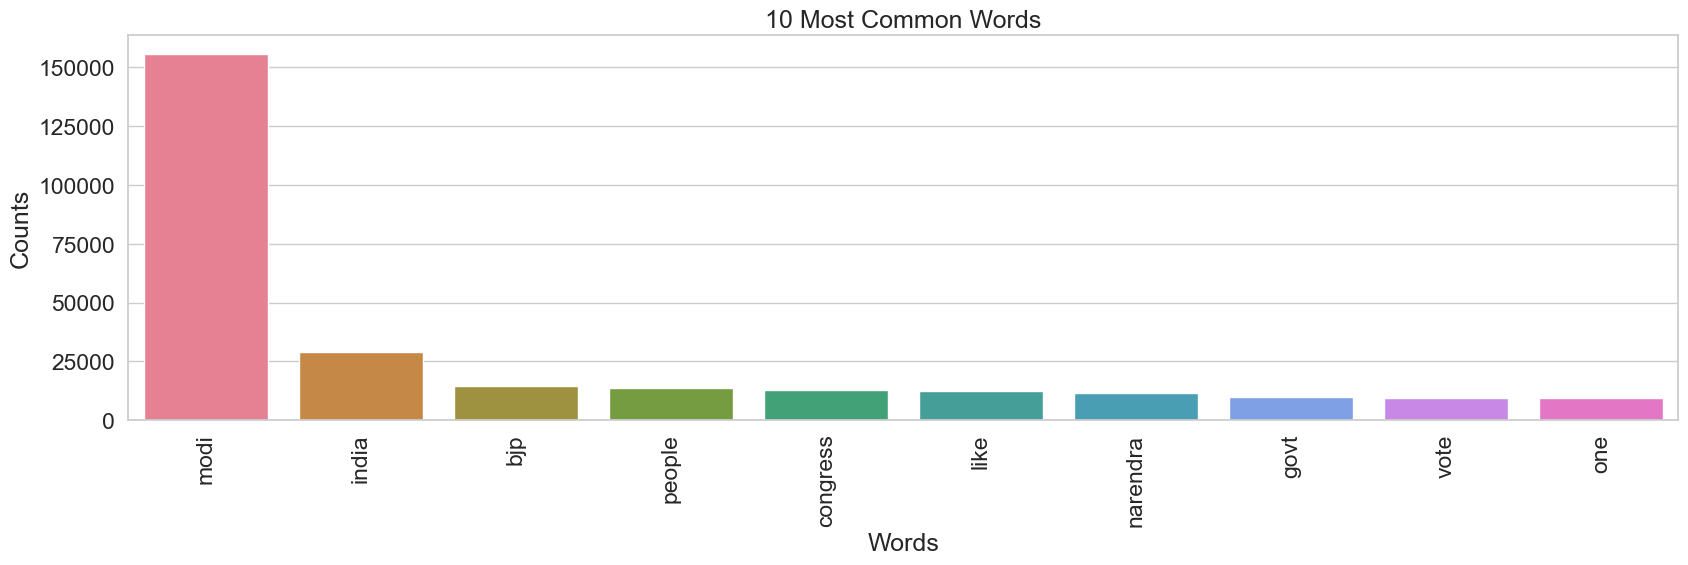

In [5]:
def plot_10_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names_out()
    total_counts = np.zeros(len(words))
    
    for t in count_data:
        total_counts += t.toarray()[0]
        
    count_dict = zip(words, total_counts)
    count_dict = sorted(count_dict, key=lambda x: x[1], reverse=True)[:10]
    
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    
    x_pos = np.arange(len(words))
    
    plt.figure(2, (20, 5))
    sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth': 2.5})
    sns.barplot(x=x_pos, y=counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90)
    plt.xlabel('Words')
    plt.ylabel('Counts')
    plt.title('10 Most Common Words')
    plt.show()

count_vectorizer = CountVectorizer(stop_words=stop)
count_data = count_vectorizer.fit_transform(df['Text'])
plot_10_most_common_words(count_data, count_vectorizer)


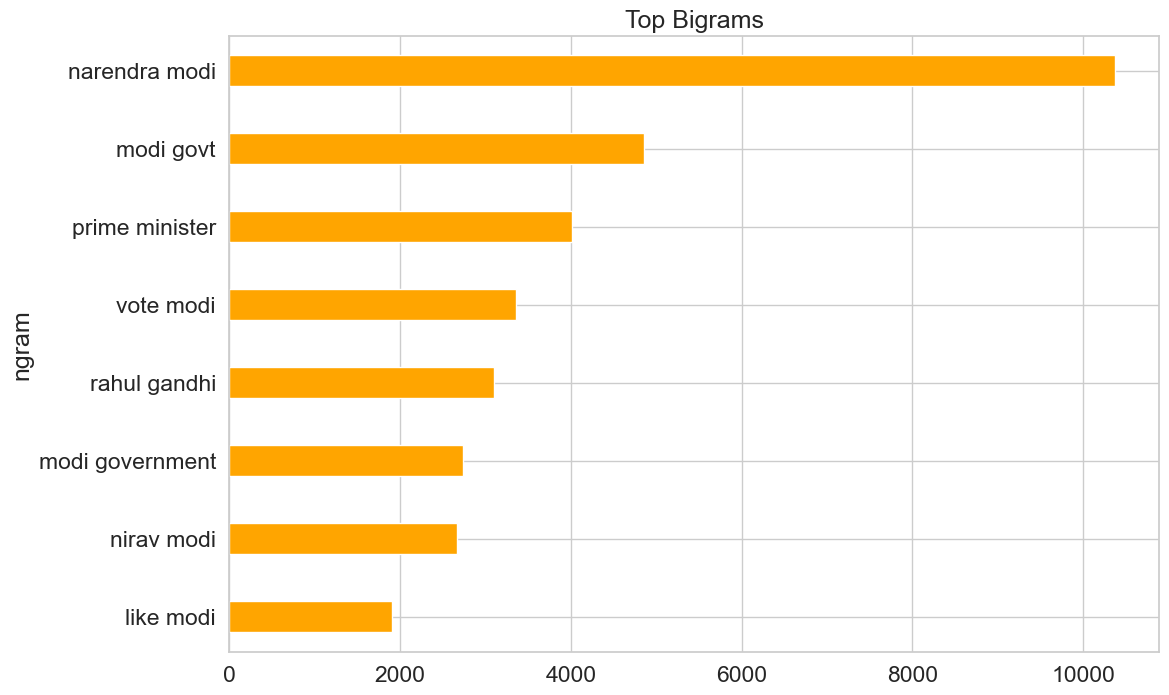

In [6]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 4), stop_words="english").fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    return words_freq[:n]

common_words = get_top_n_bigram(df['Text'], 8)
bigram_df = pd.DataFrame(common_words, columns=['ngram', 'count'])

bigram_df.groupby('ngram').sum()['count'].sort_values().plot.barh(
    title='Top Bigrams', color='orange', width=.4, figsize=(12, 8)
)
plt.show()


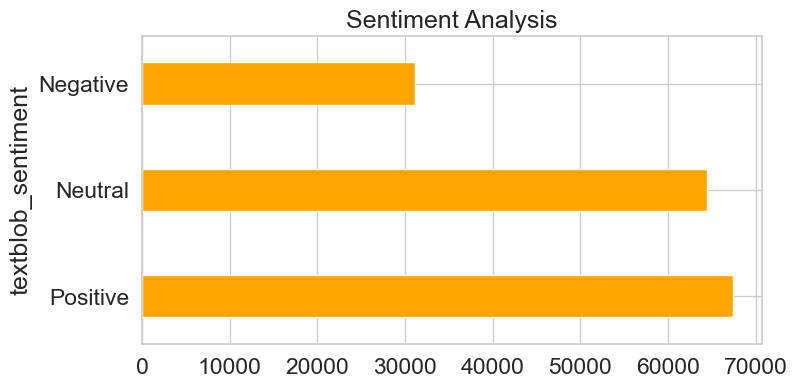

In [7]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

df['subjectivity'] = df['Text'].apply(get_subjectivity)
df['polarity'] = df['Text'].apply(get_polarity)

df['textblob_score'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

neutral_threshold = 0.05
df['textblob_sentiment'] = df['textblob_score'].apply(
    lambda c: 'Positive' if c >= neutral_threshold else ('Negative' if c <= -neutral_threshold else 'Neutral')
)

df["textblob_sentiment"].value_counts().plot.barh(
    title='Sentiment Analysis', color='orange', width=.4, figsize=(8, 4)
)
plt.show()


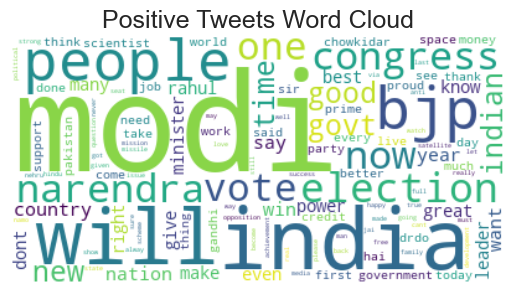

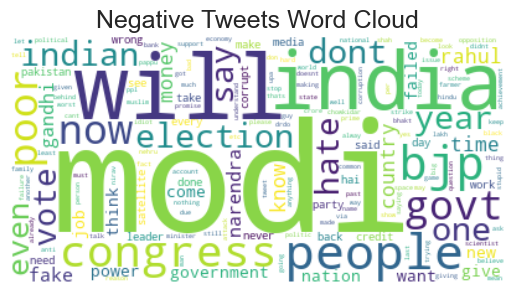

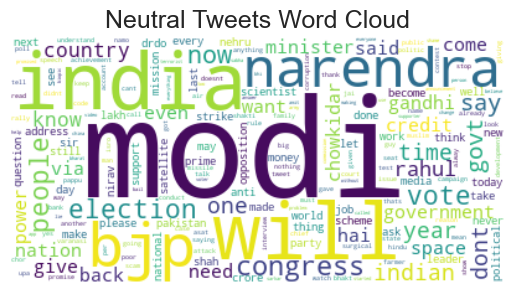

In [8]:
# Positive
df_positive = df[df['textblob_sentiment'] == 'Positive']
positive_tw = " ".join(t for t in df_positive.Text)
word_cloud1 = WordCloud(collocations=False, background_color='white').generate(positive_tw)

plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Tweets Word Cloud")
plt.show()

# Negative
df_negative = df[df['textblob_sentiment'] == 'Negative']
negative_tw = " ".join(t for t in df_negative.Text if t[0].lower() not in ["f", "n", "s"])
word_cloud2 = WordCloud(collocations=False, background_color='white').generate(negative_tw)

plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Tweets Word Cloud")
plt.show()

# Neutral
df_neutral = df[df['textblob_sentiment'] == 'Neutral']
neutral_tw = " ".join(t for t in df_neutral.Text)
word_cloud3 = WordCloud(collocations=False, background_color='white').generate(neutral_tw)

plt.imshow(word_cloud3, interpolation='bilinear')
plt.axis('off')
plt.title("Neutral Tweets Word Cloud")
plt.show()
